## Impact Analysis and Visualization

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

### Load Combined Data

In [2]:
data = pd.read_csv('../data/combined_data.csv', parse_dates=['date'])
data.set_index('date', inplace=True)

### Volatility Analysis

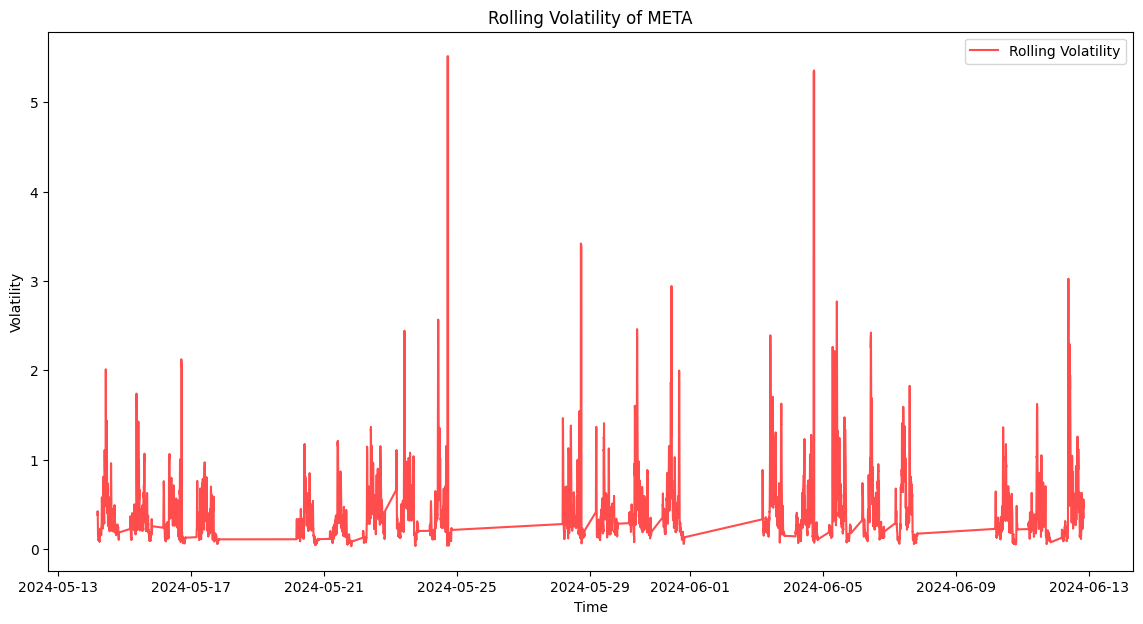

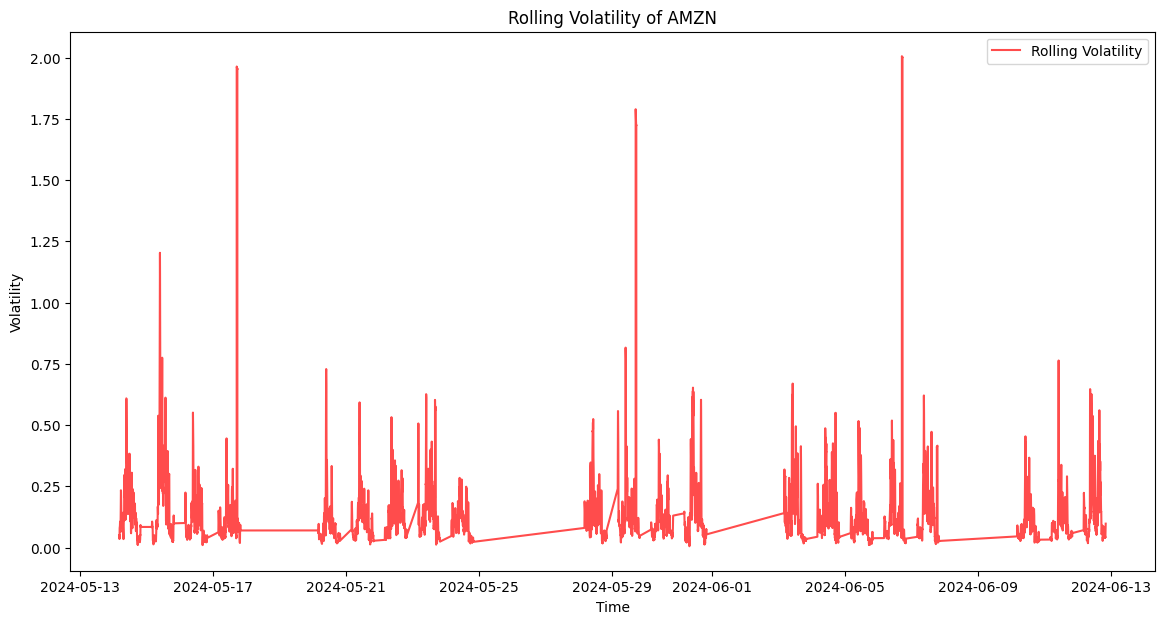

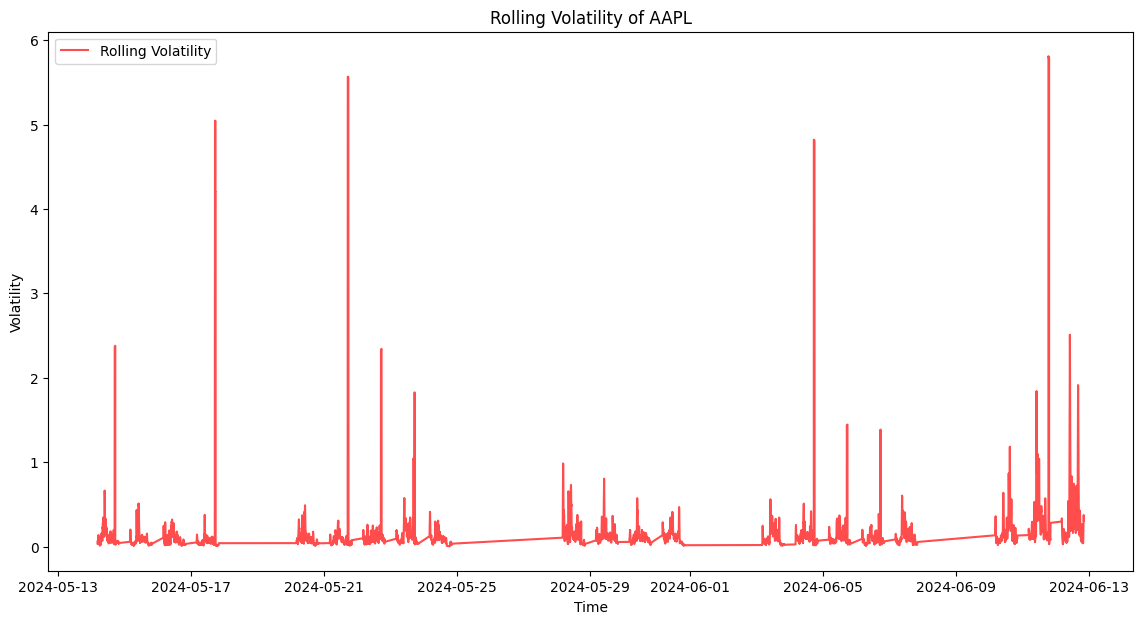

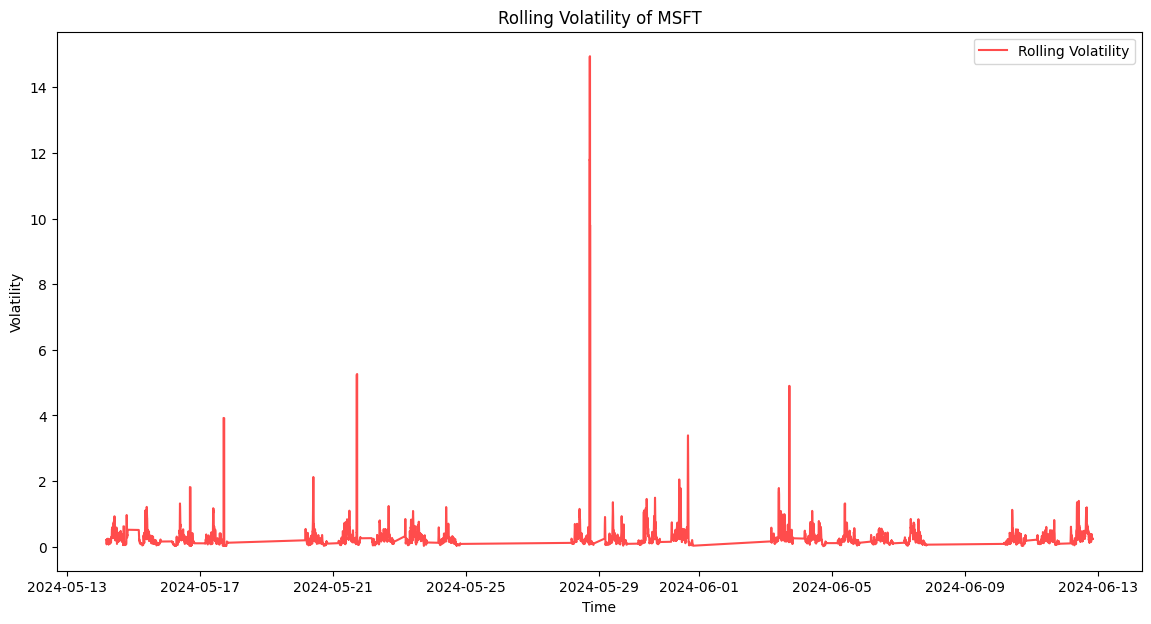

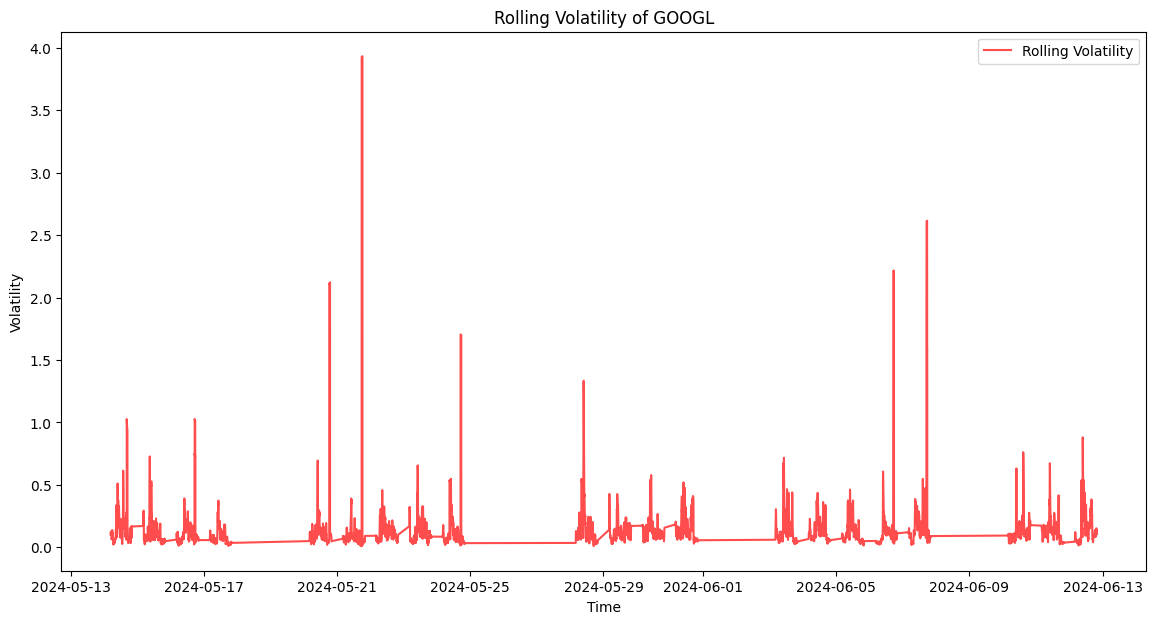

In [3]:
# Calculate rolling volatility (standard deviation) for each symbol
rolling_window = 30  # 30-period rolling window

data['rolling_volatility'] = float('nan')  # Initialize the column in the original dataframe

for symbol in data['symbol'].unique():
    symbol_data = data[data['symbol'] == symbol]
    rolling_volatility = symbol_data['4. close'].rolling(window=rolling_window).std()
    data.loc[symbol_data.index, 'rolling_volatility'] = rolling_volatility

    # Plot rolling volatility
    plt.figure(figsize=(14, 7))
    plt.plot(symbol_data.index, rolling_volatility, label='Rolling Volatility', color='red', alpha=0.7)
    plt.title(f'Rolling Volatility of {symbol}')
    plt.xlabel('Time')
    plt.ylabel('Volatility')
    plt.legend()
    plt.show()

### Price Change and Volume Relationship

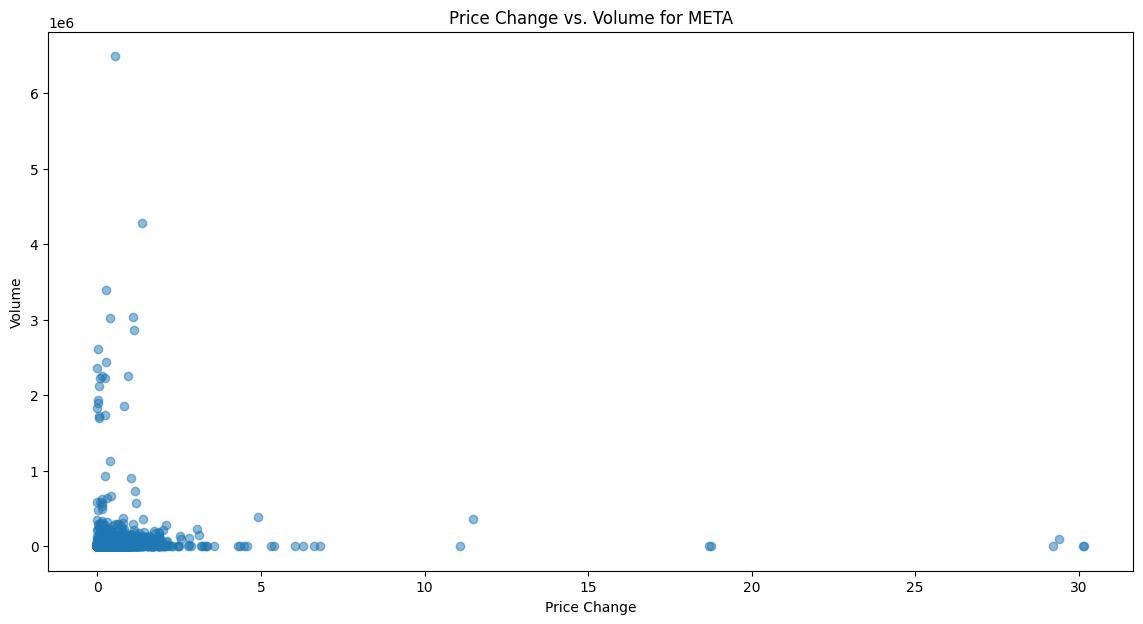

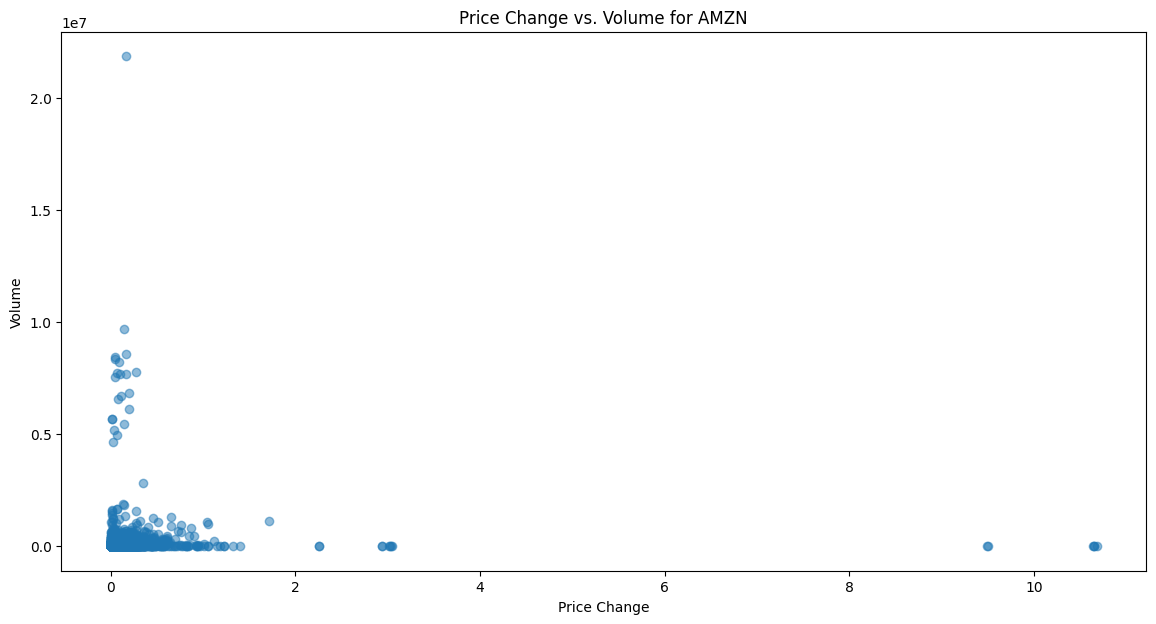

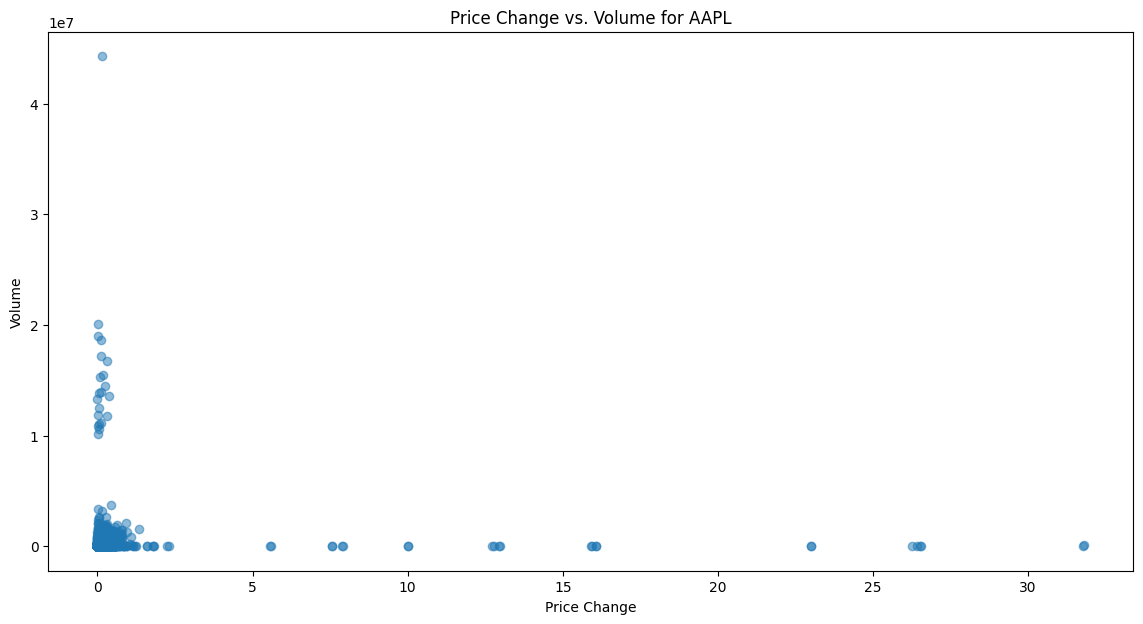

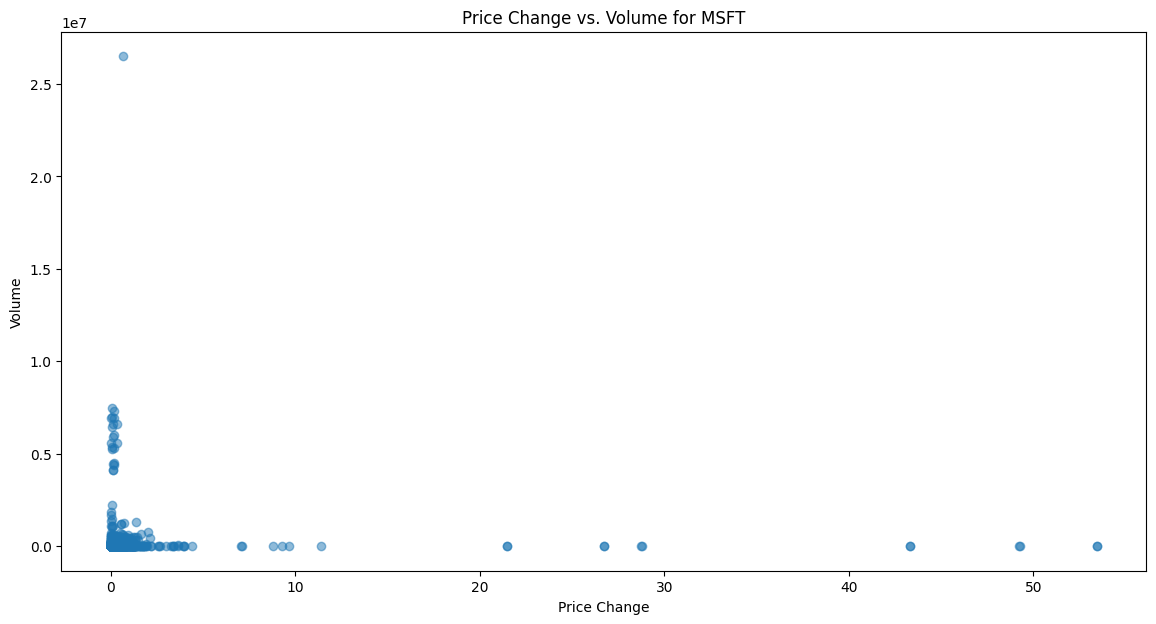

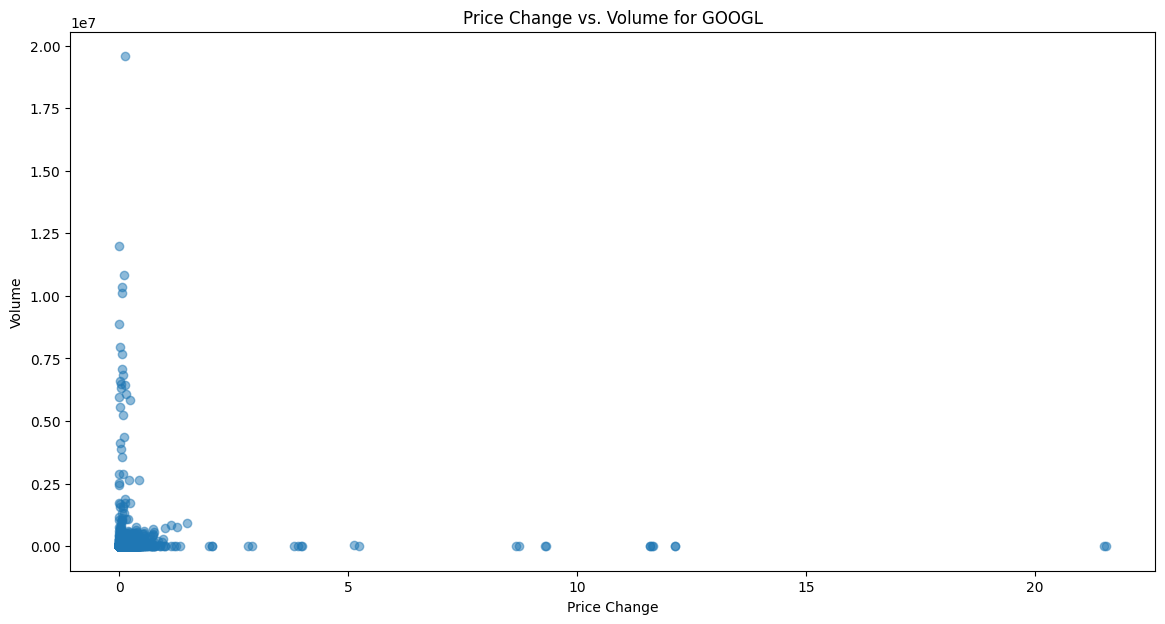

In [4]:
# Initialize the column in the original dataframe
data['price_change'] = float('nan')

# Calculate absolute price changes for each symbol
for symbol in data['symbol'].unique():
    symbol_data = data[data['symbol'] == symbol].copy()  # Use .copy() to avoid SettingWithCopyWarning
    symbol_data['price_change'] = symbol_data['4. close'].diff().abs()
    data.loc[symbol_data.index, 'price_change'] = symbol_data['price_change']

    # Plot price change vs. volume
    plt.figure(figsize=(14, 7))
    plt.scatter(symbol_data['price_change'], symbol_data['5. volume'], alpha=0.5)
    plt.title(f'Price Change vs. Volume for {symbol}')
    plt.xlabel('Price Change')
    plt.ylabel('Volume')
    plt.show()

### Feature Importance

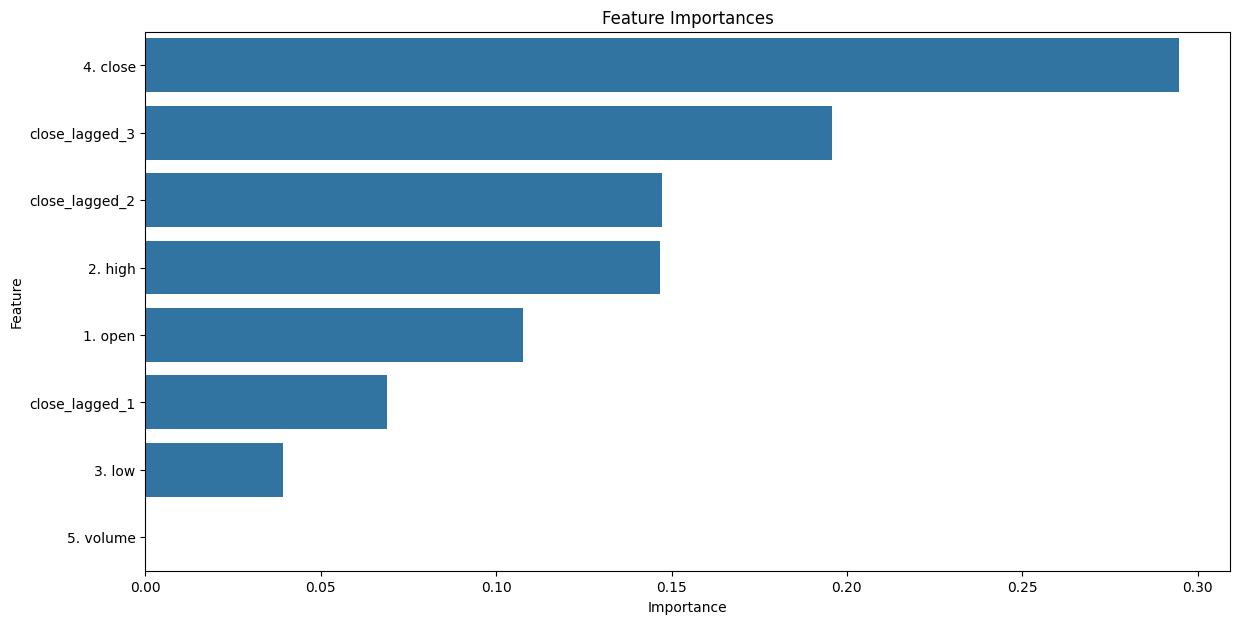

In [5]:
# Train a Random Forest model to identify feature importance
features = ['1. open', '2. high', '3. low', '4. close', '5. volume', 'close_lagged_1', 'close_lagged_2', 'close_lagged_3']
target = '4. close'

# We will use the combined data for this purpose
X = data[features]
y = data[target]

forest_model = RandomForestRegressor(n_estimators=100)
forest_model.fit(X, y)

# Get feature importances
importances = forest_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(14, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()